<a href="https://colab.research.google.com/github/plaban1981/Hugging_Face_transformers_topics/blob/main/Generate_Blog_Posts_with_GPT2_%26_Hugging_Face_Transformers_%7C_AI_Text_Generation_GPT2_Large.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

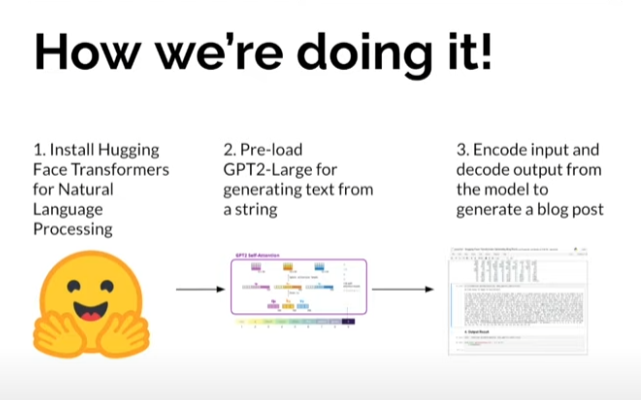

## Steps
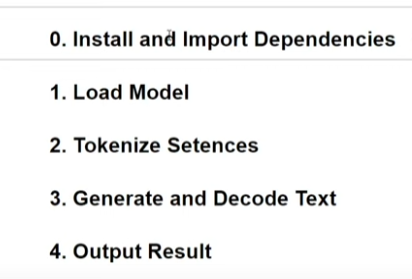

## Install and import dependecies

In [3]:
!pip install -q transformers

     |████████████████████████████████| 4.9 MB 28.3 MB/s 
     |████████████████████████████████| 163 kB 70.7 MB/s 
     |████████████████████████████████| 6.6 MB 55.2 MB/s 


In [4]:
import tensorflow as tf
from transformers import GPT2LMHeadModel, GPT2Tokenizer

## Load Model

In [5]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-large")

Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/666 [00:00<?, ?B/s]

* tokenizer converts a word to a number which will be passed on to the model as input

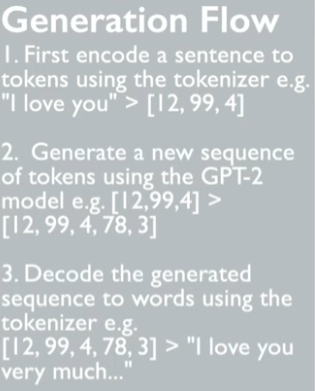

In [ ]:
tokenizer.eos_token_id

50256

In [ ]:
tokenizer.decode(tokenizer.eos_token_id)

'<|endoftext|>'

* pad with end of text token

In [6]:
model = GPT2LMHeadModel.from_pretrained("gpt2-large", pad_token_id=tokenizer.eos_token_id)

Downloading:   0%|          | 0.00/3.25G [00:00<?, ?B/s]

## Tokenize Sentence

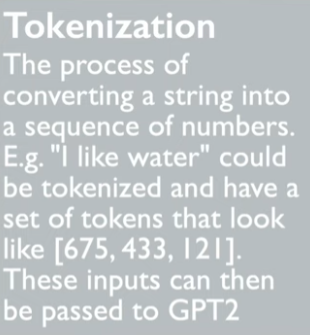

In [ ]:
sentence = 'YouTube Title: Credit card Fraud Detection'
input_ids = tokenizer.encode(sentence, return_tensors='pt')

In [11]:
sentence = 'AI is too difficult to understand from a layman’s perspective'
input_ids = tokenizer.encode(sentence, return_tensors='pt')

In [7]:
input_ids

tensor([[31281,  1102,  4516,  1088,  9552]])

In [8]:
input_ids[0][4]

tensor(9552)

#### Decoding tokens into text

In [9]:
tokenizer.decode(input_ids[0][4])

' AI'

## Generate Text

* num_beam ==> specifies the number of beam search trees to get the next probable sentence.
* no_repeat_ngram_size=2 ==> stops the model from repeating certain sequences i.e seuquence of two again and again. Here a sequence of 2 can be generated only once.

In [12]:
# generate text until the output length (which includes the context length) reaches 300
output = model.generate(input_ids, max_length=600, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)

In [16]:
output

tensor([[ 2061,   389,   262, 14136,  1102, 11755,  1088,  9552,    30,   198,
           198, 31281,  1102,  4516,  1303,    16,    25,  9552,   318,   257,
          2372,   284,   262,  1692,  3234,    13,   770,   318,   262,   749,
          2219, 43122,   546,  9552,    13,   632,   318,  2081,   326,  9552,
           468,   262,  2785,   284,  4117,  9265,    13,  2102,    11,   428,
           318,   407,   262,   691,  2372,    13,  1318,   389,   867,   584,
          7432,   284,  9265,    11,   884,   355,  4258,  1487,    11,  4523,
          1175,    11, 19798,   368,   873,    11,   290,  8649,    13,  2312,
           389,   655,   257,  1178,   286,   262,   867,  7432,   326,   389,
           503,   612,    13,  9552,   460,   635,   307,   973,   329,   922,
            13,  1114,  1672,    11,   340,   318,  1744,   284,   779,  9552,
           284,  2987,   262,  3081,   286,  1204,   329,  5242,   286,   661,
          1088,   262,   995,    13,   554,  1109,  

## Decode Text

In [13]:
print(tokenizer.decode(output[0], skip_special_tokens=True))

AI is too difficult to understand from a layman’s perspective.

In this article, I will try to explain some of the most important concepts in AI and how they can be applied in the real world. This article is not meant to be a comprehensive guide to AI, but rather to give you an idea of what you need to know in order to get started with AI. I hope that you will find it useful, and if you have any questions or comments, please feel free to leave a comment below or send me an email at [email protected].


## Example 2

In [ ]:
sentence = 'Demonetization in India'
input_ids = tokenizer.encode(sentence, return_tensors='pt')
# generate text until the output length (which includes the context length) reaches 300
output = model.generate(input_ids, max_length=1000, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
print(tokenizer.decode(output[0], skip_special_tokens=True))

Demonetization in India

India is the world's largest democracy, with a population of over 1.2 billion people. It is also one of the most populous countries in terms of land area. However, the country's economy is heavily dependent on agriculture, which accounts for about 70% of its GDP. The country has a large number of small and medium-sized enterprises (SMEs), which are the backbone of India's manufacturing sector. These SMEs account for more than half of all employment in the economy, and they are also the largest source of foreign direct investment (FDI) into India. As a result, India is a major exporter of goods and services to other countries, including the European Union (EU), the United States (US), Japan (JAPAN), Australia (AUSTRALIA), China (CHINA), and South Korea (KOREA). The Indian economy has been growing at an average annual rate of 7.5% over the past five years, making it the fastest-growing major economy in Asia-Pacific (APEC) and the third-fastest growing economy glo

In [ ]:
tokenizer.decode(input_ids[0])

'Demonetization in India'

## Output result

In [ ]:
text = tokenizer.decode(output[0], skip_special_tokens=True)
with open("Demonetization_india_blogpost.txt",'w') as f:
  f.write(text)